# Data Exploration

This dataset classifies people described by a set of attributes as good or bad credit risks. Two datasets are provided.  the original dataset, in the form provided by Prof. Hofmann, contains categorical/symbolic attributes and is in the file "taiwan.data".   
 
For algorithms that need numerical attributes, Strathclyde University produced the file "taiwan.data-numeric".  This file has been edited and several indicator variables added to make it suitable for algorithms which cannot cope with categorical variables.   Several attributes that are ordered categorical (such as attribute 17) have been coded as integer.    This was the form used by StatLog.

##  Import library 

In [1]:
# import necessary packages
import keras
import os
import time
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier #
import math
from mlxtend.preprocessing import minmax_scaling

import pandas as pd
import numpy as np
import datetime

# Plots
import seaborn as sns
sns.set()
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split

from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras

import sys

from collections import Counter
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours

In [2]:
from preprocessing_taiwan import outliers_remove

In [3]:
from visualization_taiwan import boxplot_features, box_plot, distribution_plot, missing_percentage, outliers_plot, corr_matrix

## Import Data

In [4]:
data_folder = '../dataset/taiwan_1999/'
file_path =  os.path.join(data_folder, "data.csv")

df=pd.read_csv(file_path)

## Describe the data

In [5]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(6819, 96)

Now, we will understand the format of data

In [6]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [7]:
df.dtypes #knowledge of data type helps for computation

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

Features in the dataset

In [10]:
features = [i for i in df.columns]

In [11]:
# checking for null values
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [12]:
print(df['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Financially unstable: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


# Visualization

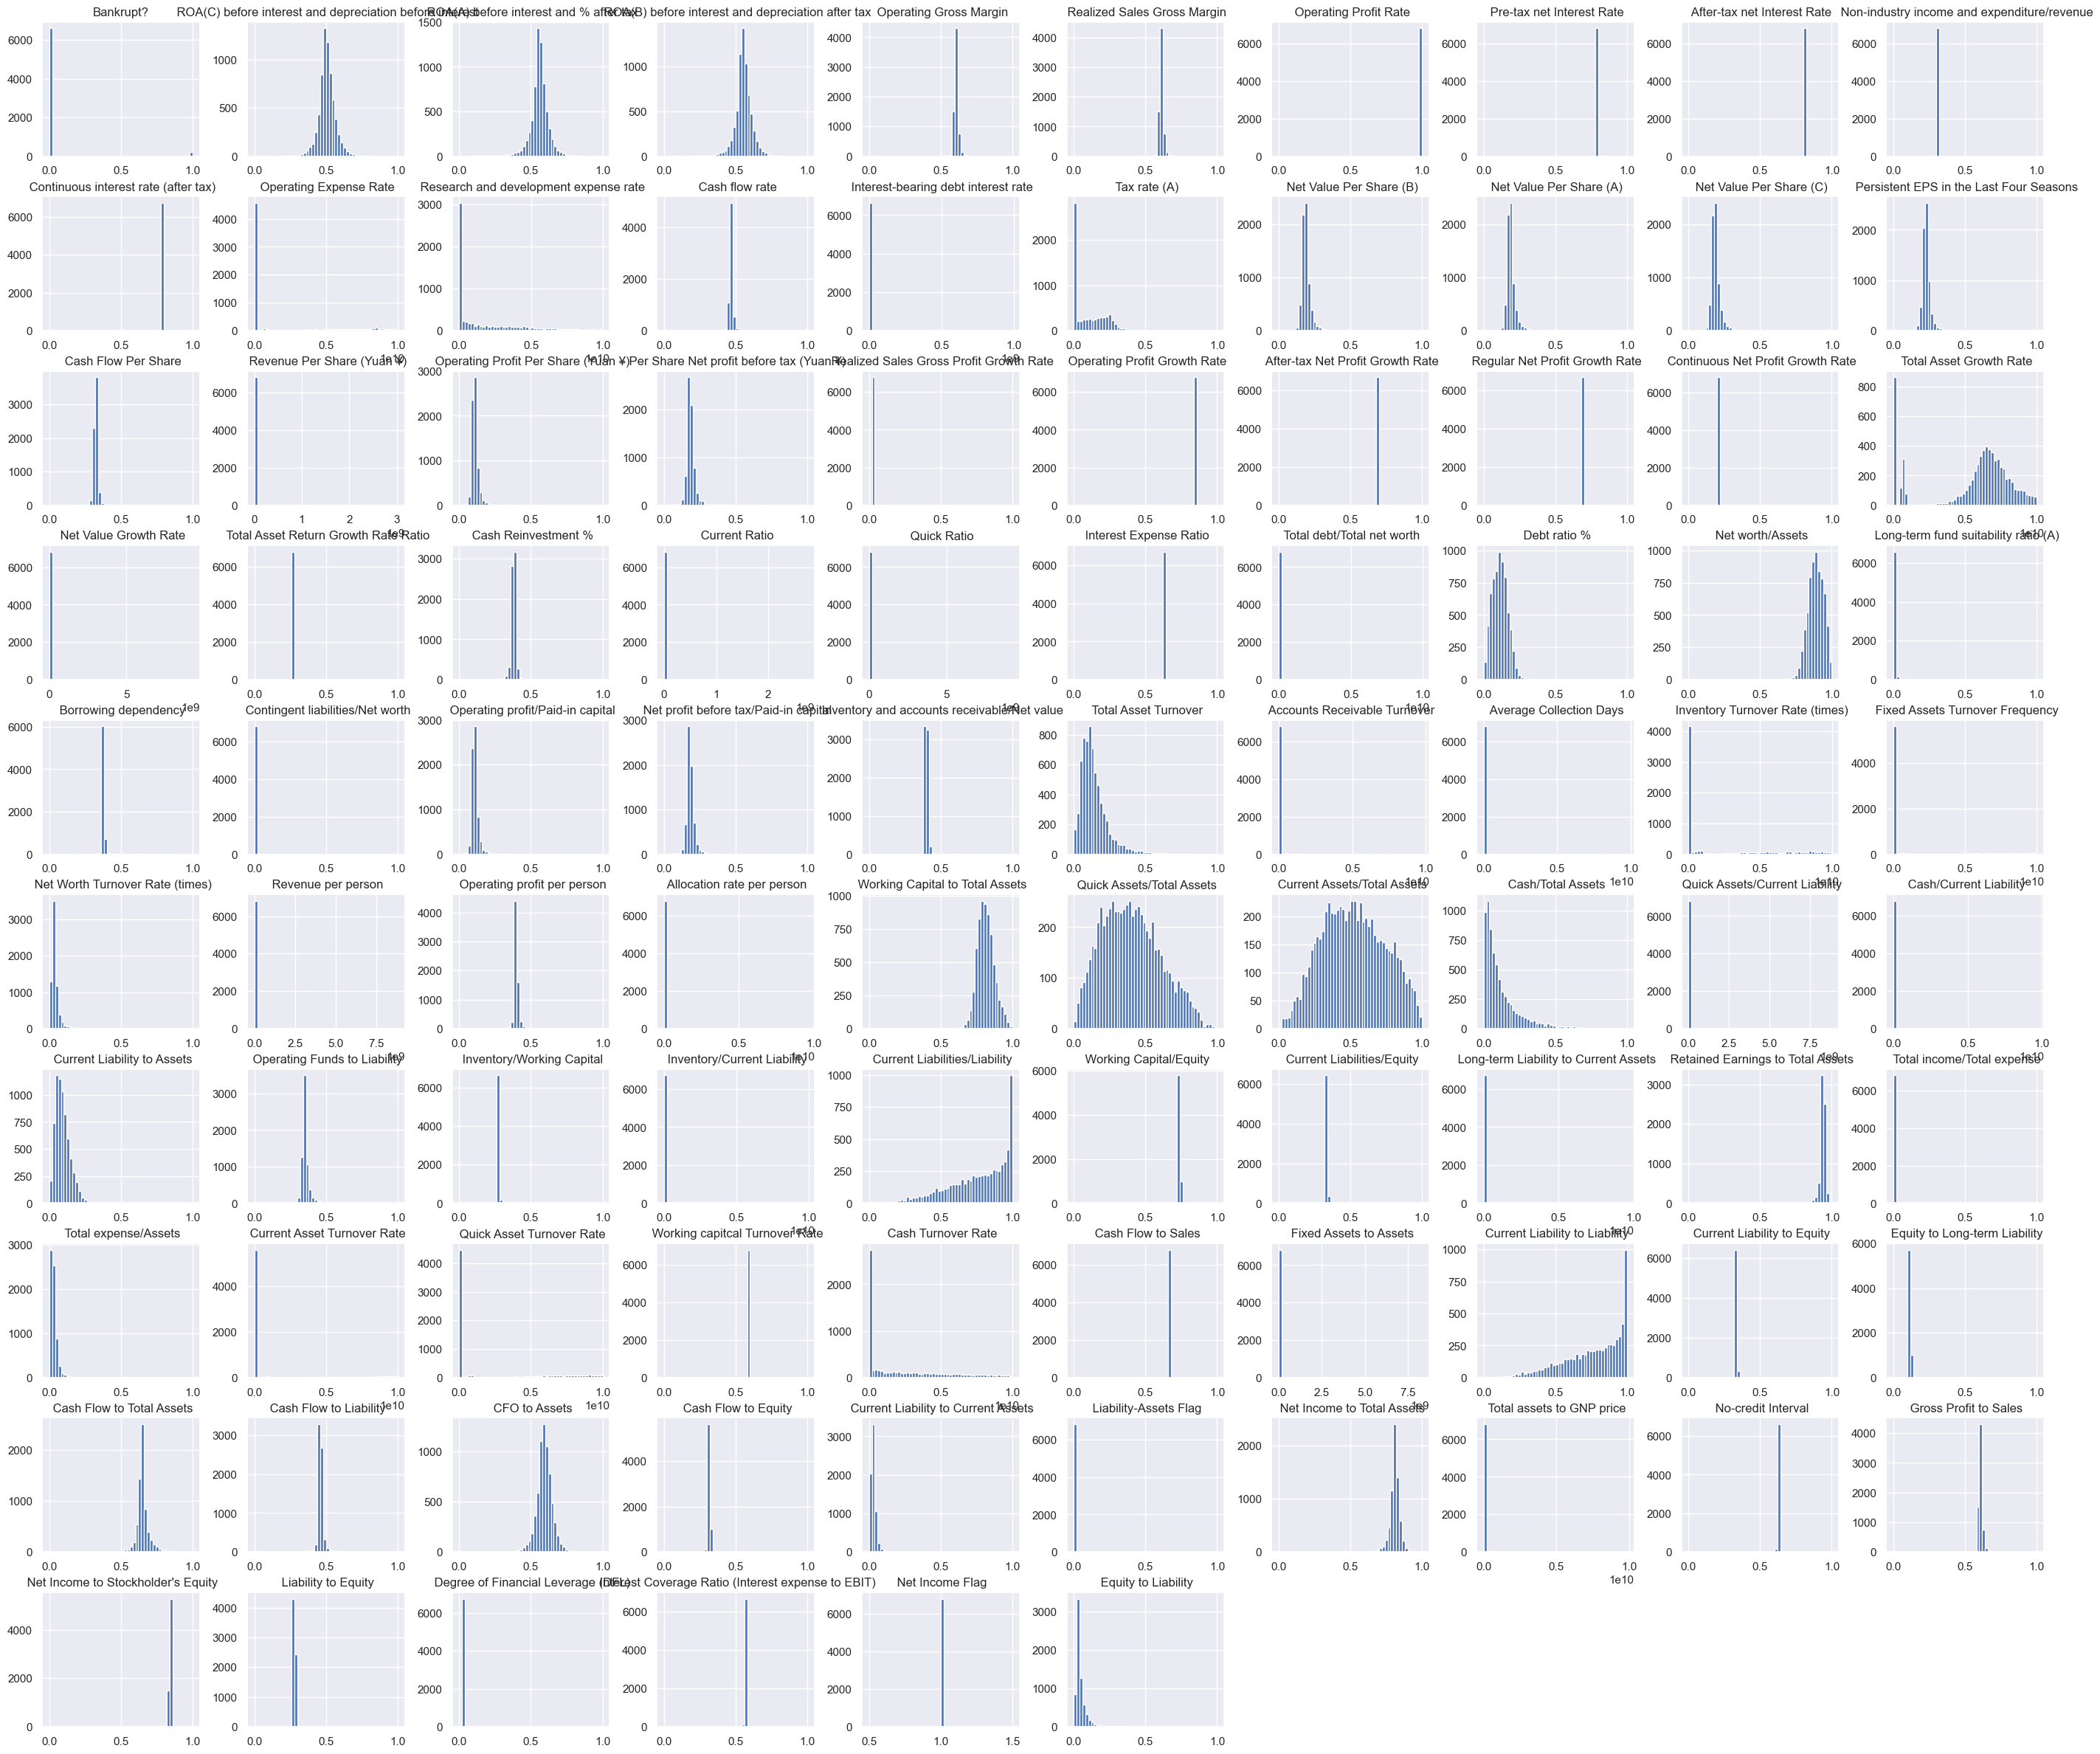

In [13]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

## Correlation matrix 

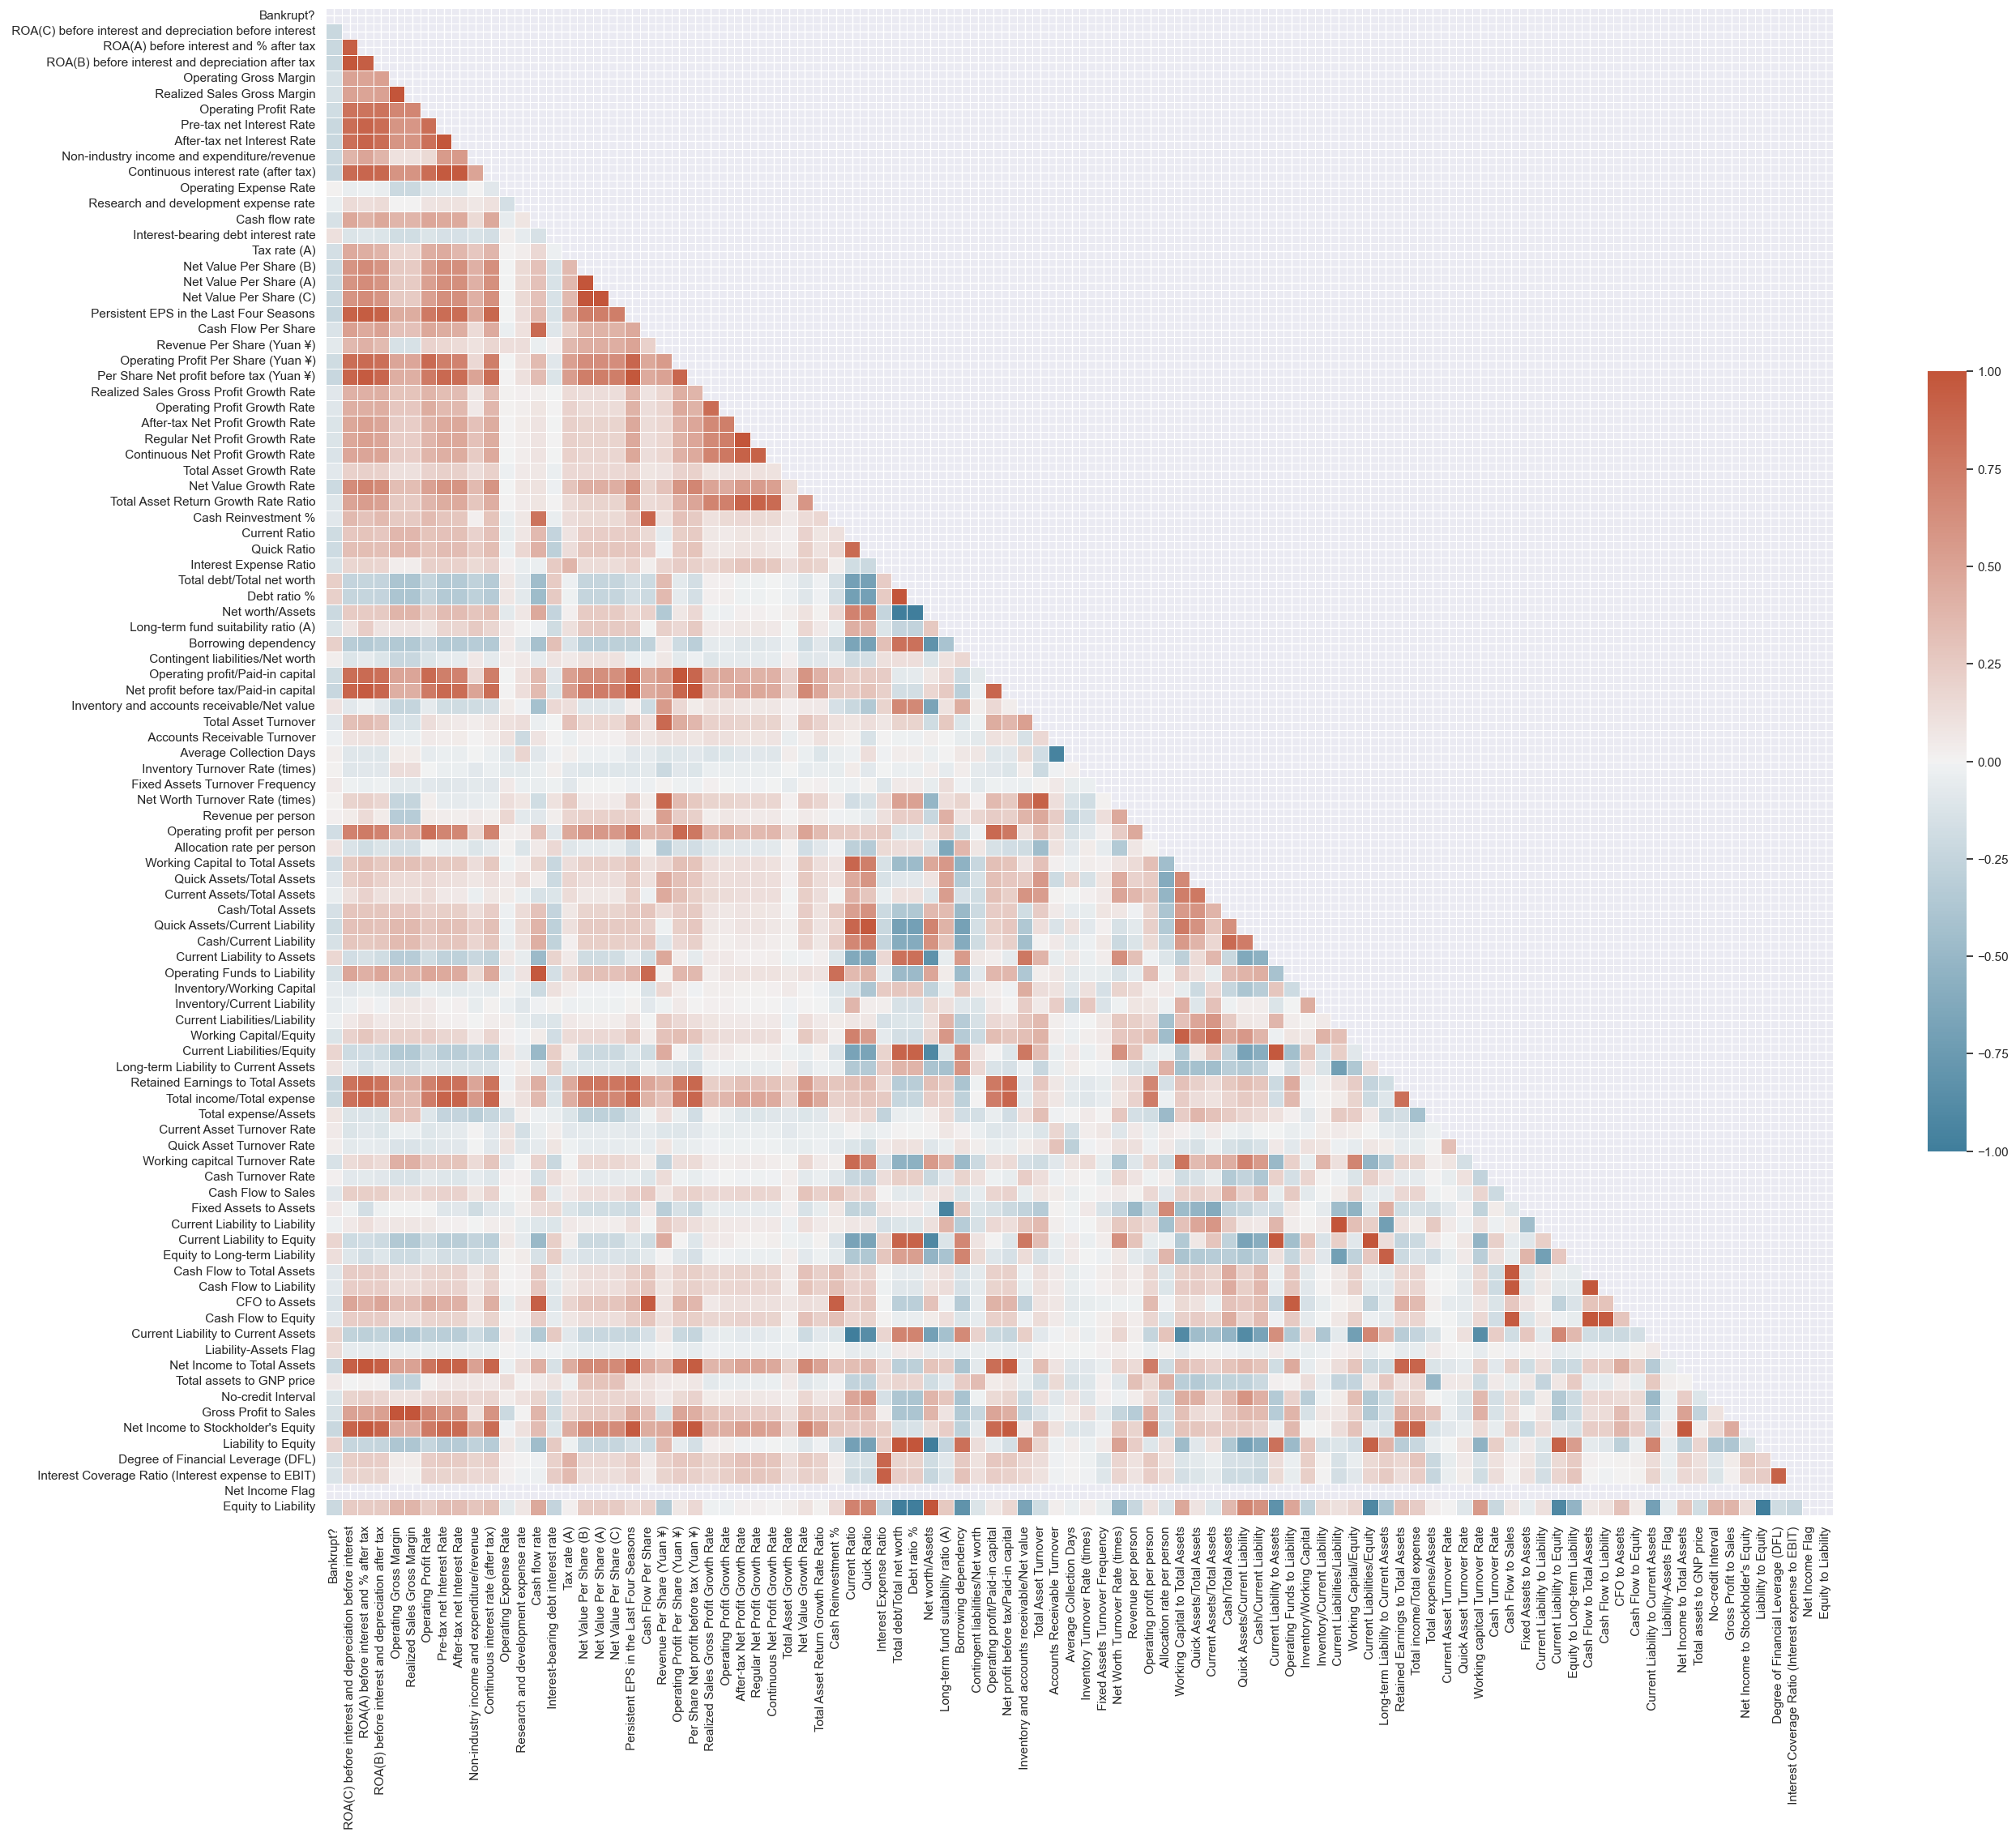

In [14]:
# EDA & VISUALIZATIONS

# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [15]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)
    

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------

In [16]:
new_df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [17]:
colors_palette1 = ['#80b27e', '#abc78d', '#d6dca0', '#fff1b9', '#f7d193', '#f1b075', '#ea8d5f']
colors_palette2 = ['#80b27e','#ea8d5f']
colors_palette2_v2 = ['#ea8d5f','#80b27e']
colors_palette3 = ['#80b27e']

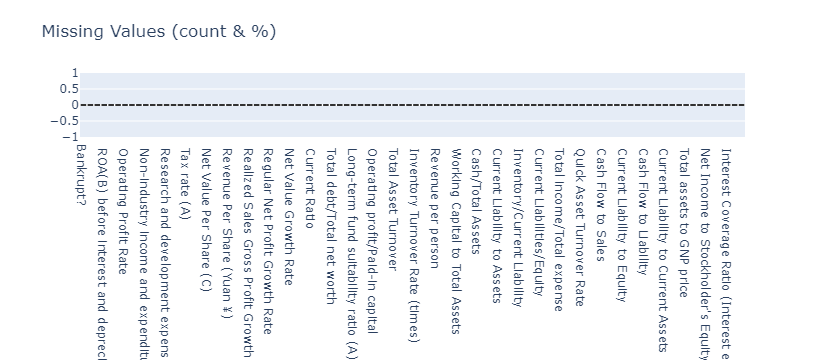

In [18]:
# missing_plot(df)
percent_missing = new_df.isnull().mean().round(4) * 100
trace = go.Bar(x = percent_missing.index, y = percent_missing.values ,opacity = 0.8, text = percent_missing.values.round(4),  textposition = 'auto',marker=dict(color=colors_palette3[0],
line=dict(color='#000000',width=2)))
layout = dict(title =  "Missing Values (count & %)")
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

There is no missing data in the entire dataset

 # Split data set to train set and test set 

In [19]:
def split_data(df):
    '''Split a dataset into train and test sets'''
    # split into input (X) and an output (Y)
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
     # Call train_test_split with the `stratify` parameter
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42,shuffle=True,stratify=y)
    return X_train, X_test, y_train, y_test

In [20]:
# Call train_test_split with the `stratify` parameter
X_train, X_test, y_train, y_test = split_data(new_df)

In [21]:
y_train_vals = y_train.value_counts()
y_test_vals = y_test.value_counts()

In [22]:
# Check dimensions
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f" + Good clients (y=0): {y_train_vals[0]}")
print(f" + Bad clients (y=1):\t {y_train_vals[1]}")

print("Test set:")
print(f" + Good clients (y=0): {y_test_vals[0]}")
print(f" + Bad clients (y=1):\t {y_test_vals[1]}")

(4389, 95)
(1881, 95)
Training set:
 + Good clients (y=0): 4236
 + Bad clients (y=1):	 153
Test set:
 + Good clients (y=0): 1816
 + Bad clients (y=1):	 65


<b> Using stratify for target </b>

This change ensures that the train and test sets follow the same distribution as our original dataset.

## Feature selection 

In [23]:
def plot_color_label_before(data, target):
    well_name = "RANDOM"
    highlight_colour = '#d95f02'
    non_highlight_colour = '#768493'

    data['colours'] = data['name'].apply(lambda x: highlight_colour if x == well_name else non_highlight_colour)


    data = data.sort_values(by='score')

    fig, ax = plt.subplots(figsize=(30,15))

    bars = plt.barh(data['name'], data['score'], height=0.7, color=data['colours'])

    ax.spines[['right', 'top', 'bottom']].set_visible(False) 
    ax.xaxis.set_visible(False)
    ax.yaxis.set_tick_params(labelsize=10)

    ax.bar_label(bars, padding=-45, color='white', 
                 fontsize=8, label_type='edge', fmt='%.3f%%',
                fontweight='bold')
    ax.set_title('Feature Importance', fontsize=16,
                  fontweight='bold', pad=20)
    plt.savefig("../img/randomfeature_taiwan.png")
    plt.show()
    

In [24]:
#for Pearson correlation
X_train_RF = X_train.copy()
X_test_RF = X_test.copy()

In [25]:
print(np.shape(X_train_RF))

(4389, 95)


<h4> Built-in Scikit-learn Method With A Random Feature </h4>

In [26]:
X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestClassifier(n_estimators=100, random_state=42)
rf_random.fit(X_train_random, y_train.values.ravel())

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=False, inplace=True)

In [27]:
global_importances_random

 Net Value Growth Rate                    0.032324
 Net Income to Stockholder's Equity       0.031697
 Net Value Per Share (A)                  0.020301
 Net Value Per Share (C)                  0.019607
 Degree of Financial Leverage (DFL)       0.018959
                                            ...   
 Current Assets/Total Assets              0.005166
 Long-term Liability to Current Assets    0.003379
 Tax rate (A)                             0.002149
 Net Income Flag                          0.000000
 Liability-Assets Flag                    0.000000
Length: 96, dtype: float64

In [28]:
df_score = pd.DataFrame({'name':global_importances_random.index, 'score':global_importances_random.values})

In [29]:
df_score.to_markdown

<bound method DataFrame.to_markdown of                                       name     score
0                    Net Value Growth Rate  0.032324
1       Net Income to Stockholder's Equity  0.031697
2                  Net Value Per Share (A)  0.020301
3                  Net Value Per Share (C)  0.019607
4       Degree of Financial Leverage (DFL)  0.018959
..                                     ...       ...
91             Current Assets/Total Assets  0.005166
92   Long-term Liability to Current Assets  0.003379
93                            Tax rate (A)  0.002149
94                         Net Income Flag  0.000000
95                   Liability-Assets Flag  0.000000

[96 rows x 2 columns]>

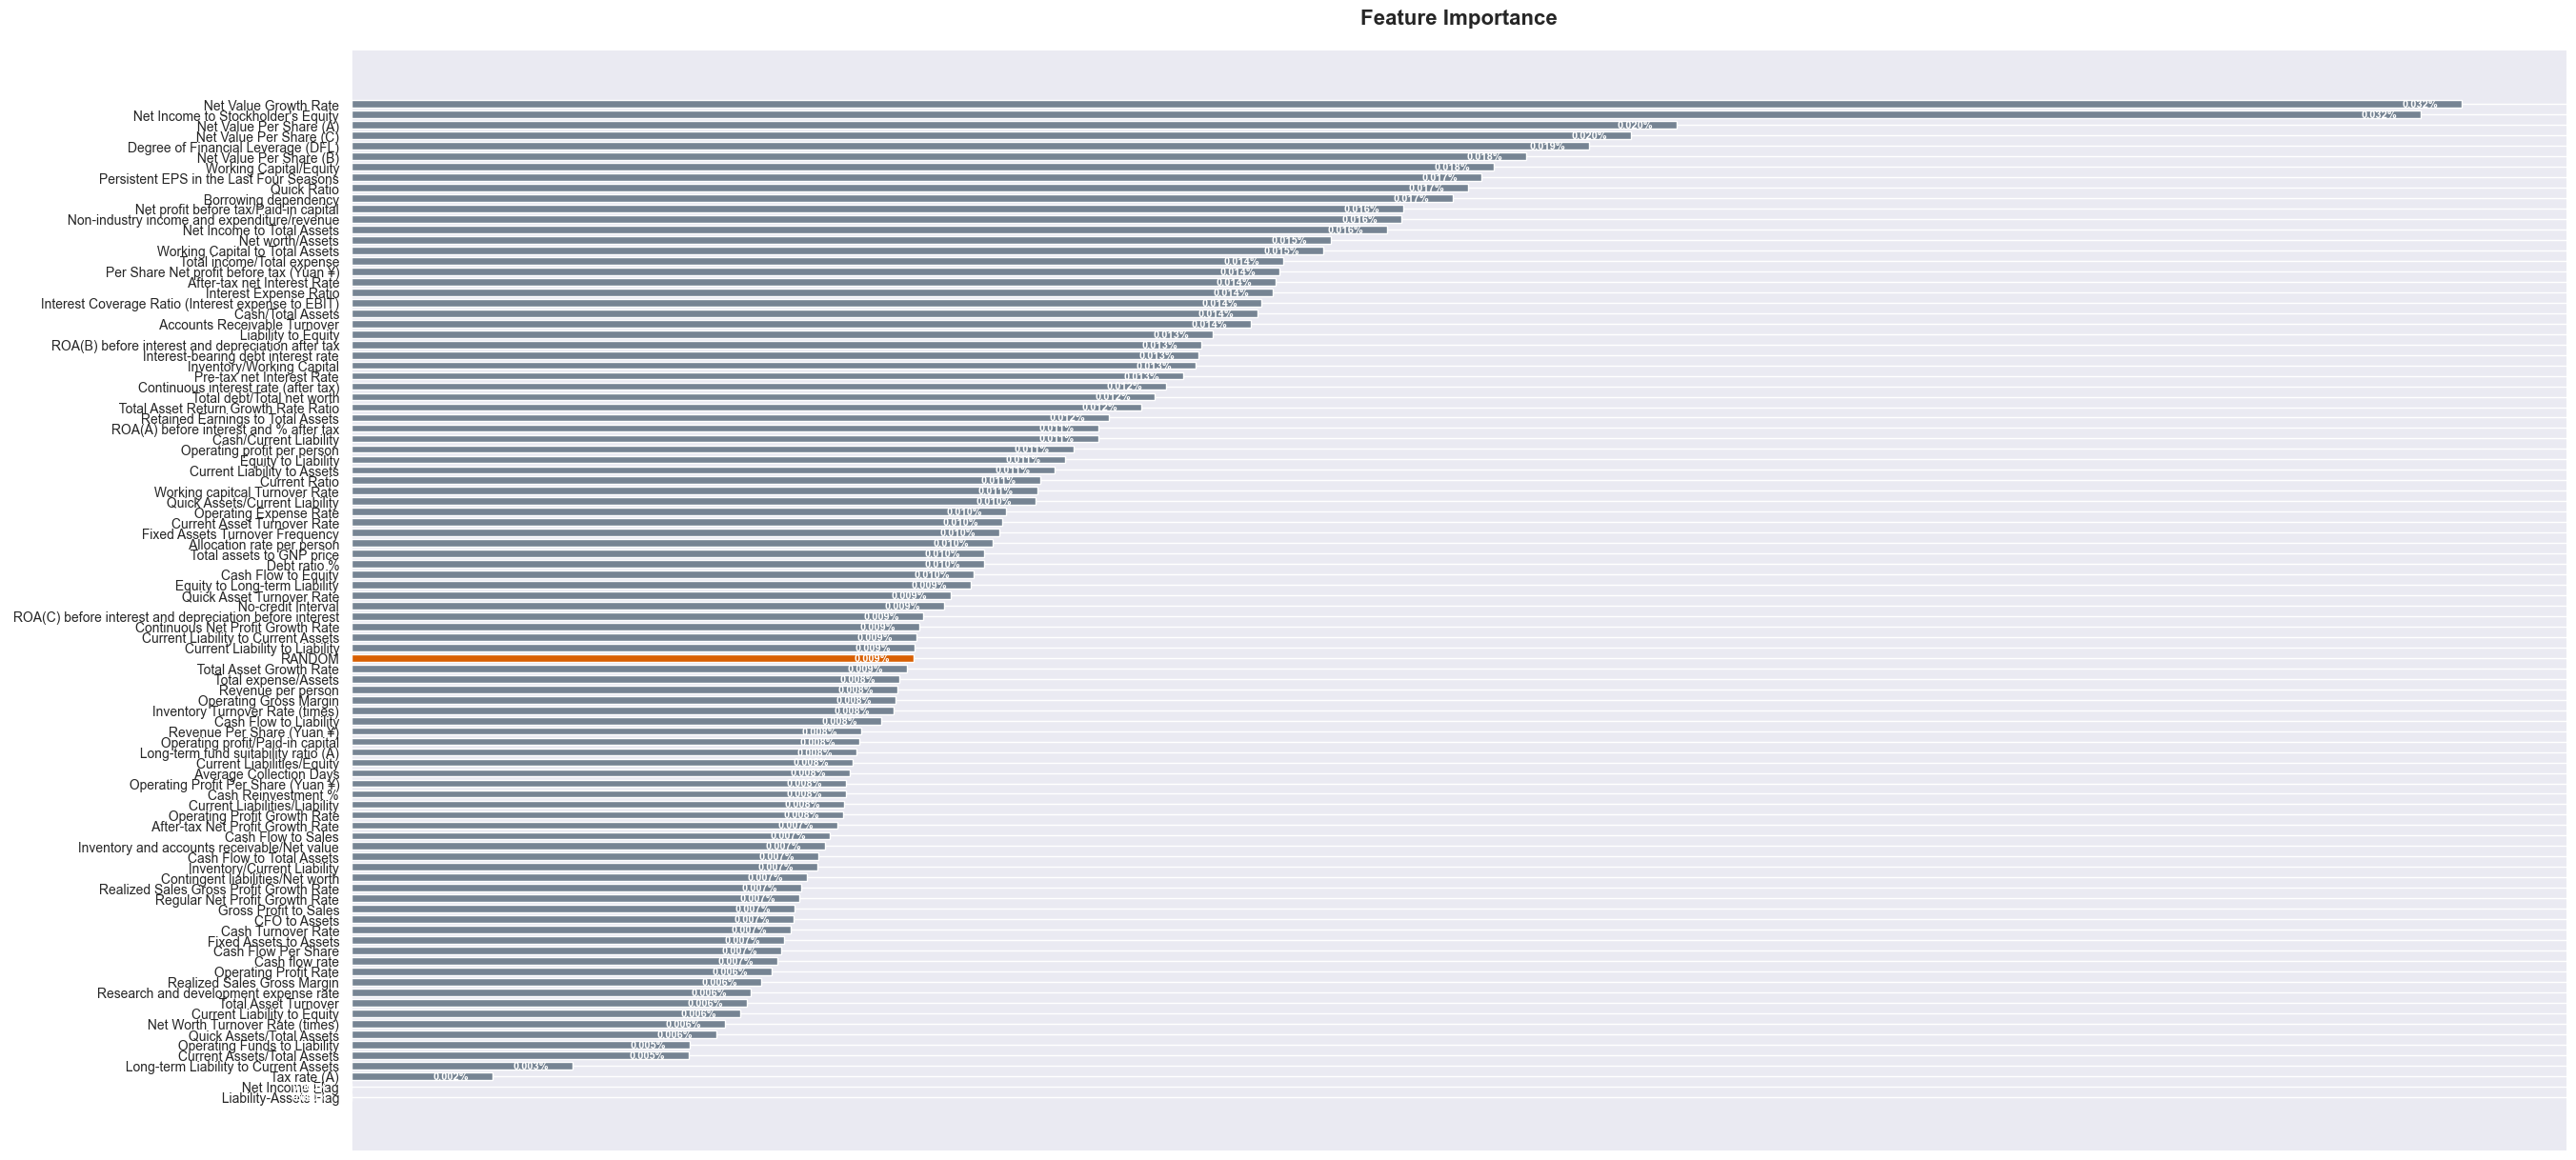

In [30]:
plot_color_label_before(df_score, 'RANDOM')

In [31]:
df_score.index[df_score['name']=='RANDOM'].tolist()

[53]

<h4> Permutation Feature Importance ((Better, but slower) </h4>

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Clean data
sorted_idx = result.importances_mean.argsort()[::-1]
pfi_df = pd.DataFrame(data=result.importances[sorted_idx].T, columns=X_test.columns[sorted_idx])

# perm_importances = result.importances_mean
# perm_std = result.importances_std
# sorted_idx = perm_importances.argsort()
# feature_names = X_test.columns

# df_score2 = pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

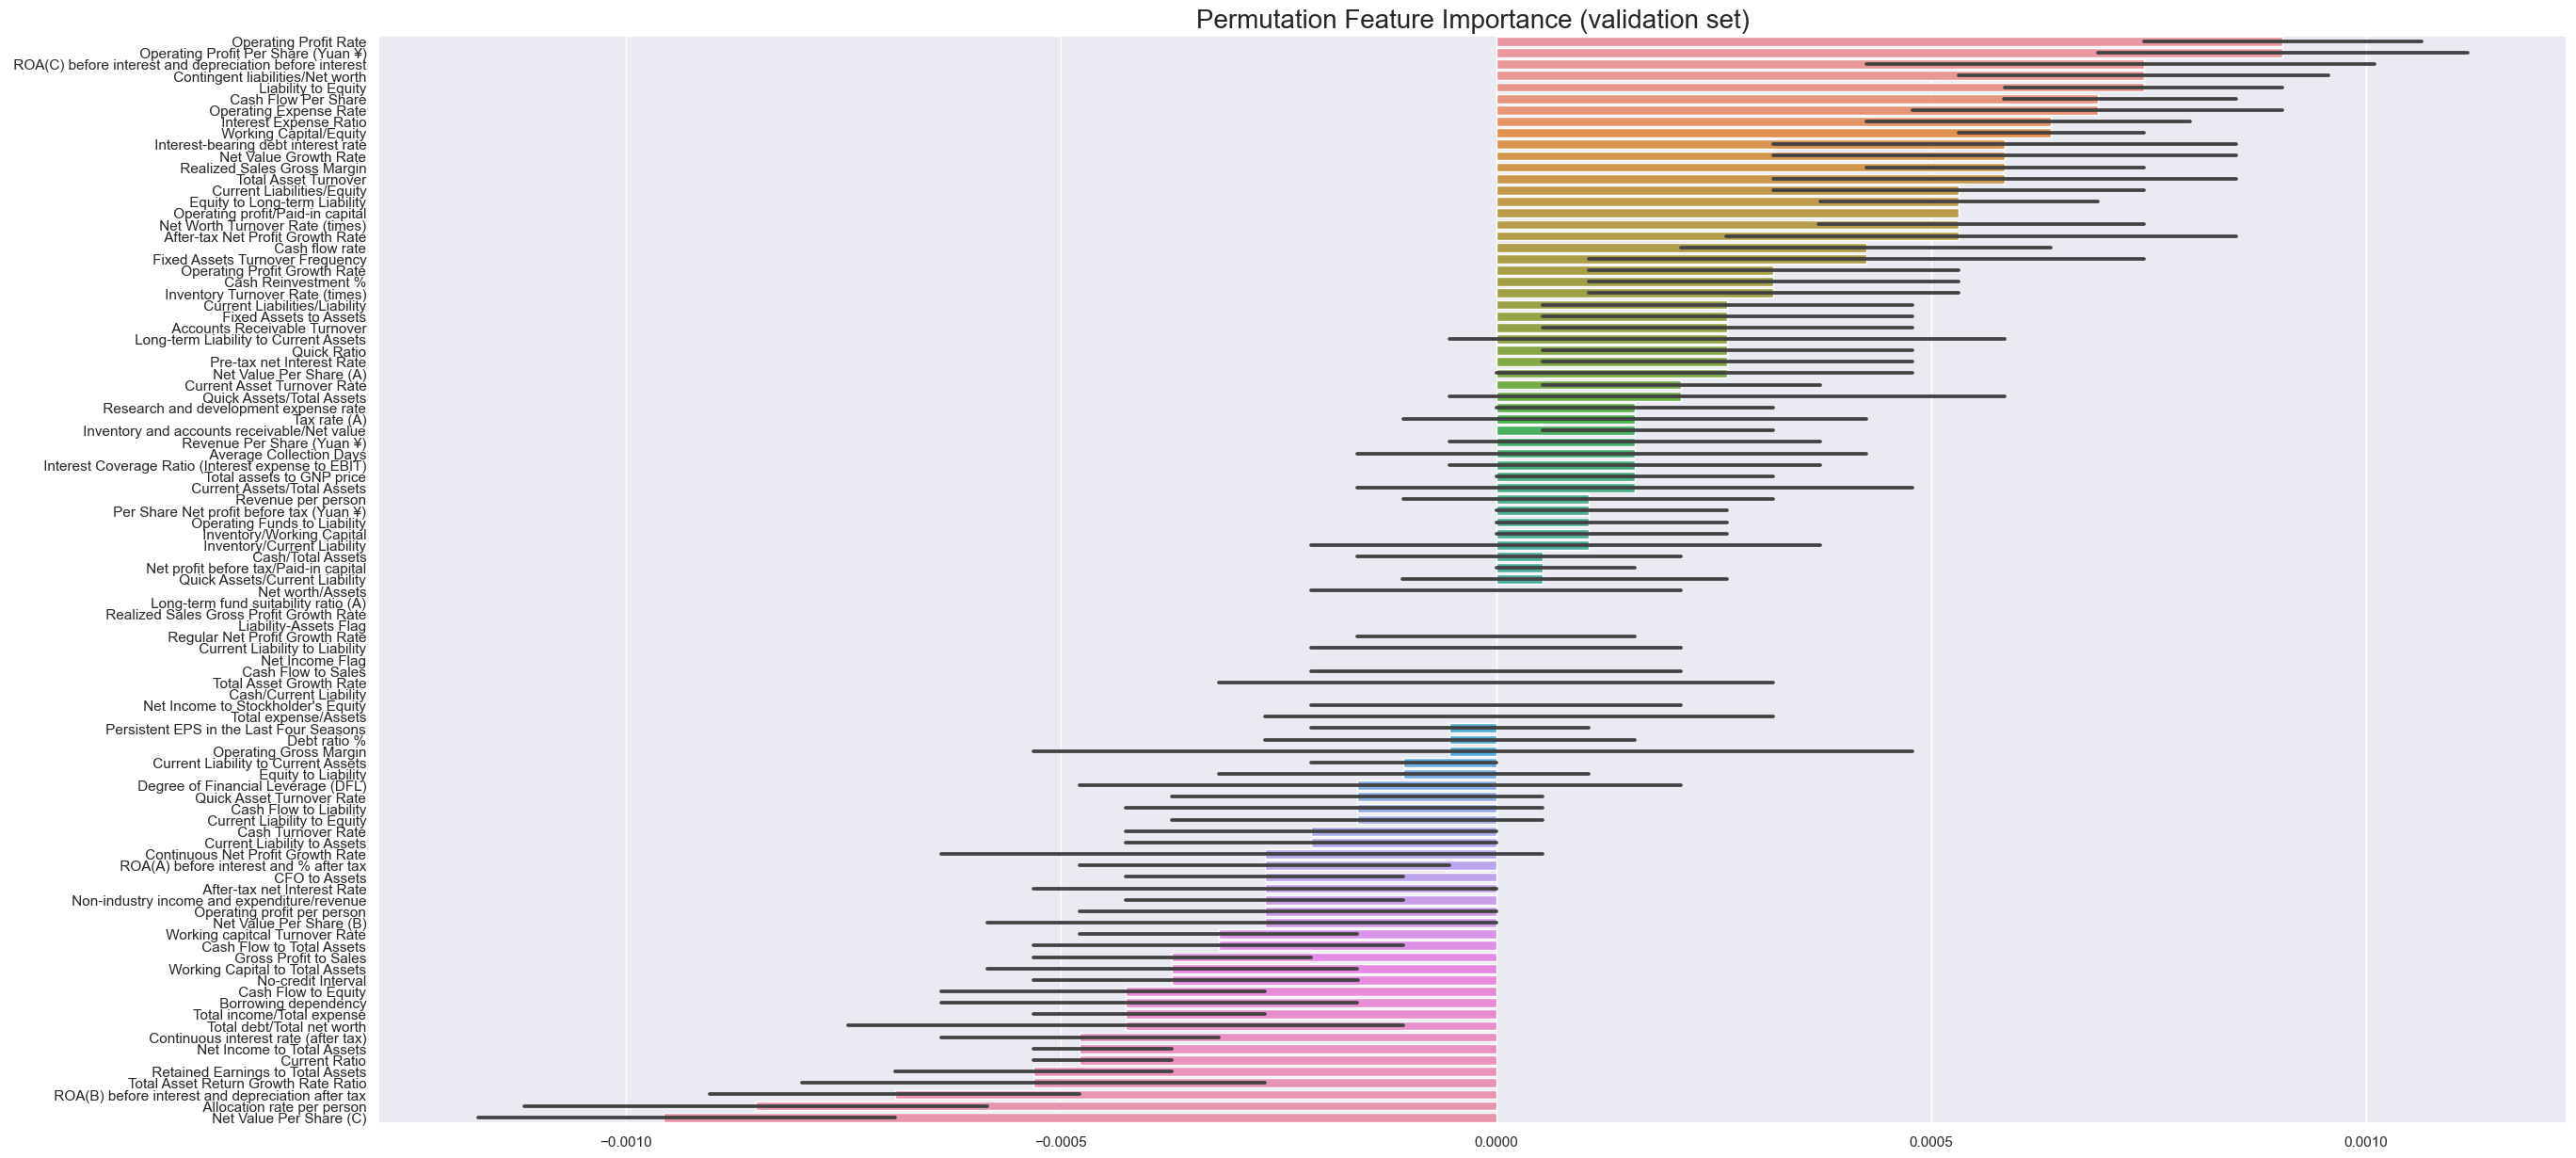

In [33]:
# Plot (This can be barplot, boxplot, violinplot,...)
plt.figure(figsize=(30,15))
sns.barplot(data=pfi_df, orient="h").set_title("Permutation Feature Importance (validation set)",  fontsize=20)
plt.savefig("../img/permutationfeature_taiwan.png")

<h4>Random Forest Feature Importance With SHAP </h4>

In [34]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [35]:
# load JS visualization code to notebook
shap.initjs()

In [36]:
# creating an explainer for our model
explainer = shap.TreeExplainer(rf) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: [0.9649943 0.0350057]


In [37]:
# Shap Values for class =0 that is  class
print("Shap Values for '0' class")
pd.DataFrame(shap_values[0],columns=X_train.columns).head()

Shap Values for '0' class


ROA(C) before interest and depreciation before interest  \
0                                           0.003132          
1                                          -0.004553          
2                                           0.000346          
3                                           0.002440          
4                                           0.000164          

    ROA(A) before interest and % after tax  \
0                                -0.000232   
1                                -0.003984   
2                                 0.001100   
3                                 0.001370   
4                                -0.000157   

    ROA(B) before interest and depreciation after tax  \
0                                          -0.004455    
1                                          -0.014402    
2                                          -0.001995    
3                                          -0.005748    
4                                           0.000324    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.000643                      0.000521   
1                -0.004736                      0.000614   
2                -0.001034                     -0.000780   
3                 0.000355                      0.003166   
4                 0.000760                      0.000082   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0               -0.000146                   -0.000294   
1                0.002329                   -0.002279   
2               -0.001701                   -0.000932   
3                0.001703                    0.004570   
4               -0.000385                    0.000085   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                     -0.000898                                     -0.004142   
1                     -0.009058                                     -0.033518   
2                      0.003323                                      0.000404   
3                      0.003060                                      0.005662   
4                      0.000790                                      0.001087   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                              -0.000182  ...                     0.000049   
1                              -0.021636  ...                    -0.006380   
2                               0.002833  ...                     0.002447   
3                               0.001058  ...                    -0.002432   
4                               0.001881  ...                     0.001513   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.000222             0.000064                0.000026   
1                    0.000740             0.000446               -0.003813   
2                   -0.000173             0.000677               -0.000795   
3                    0.001822             0.004599                0.001137   
4                    0.000055             0.000435                0.000111   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.000696              0.001975   
1                            -0.008355             -0.036058   
2                             0.004178              0.001078   
3                             0.000020             -0.006100   
4                             0.003438              0.000298   

    Degree of Financial Leverage (DFL)  \
0                             0.001365   
1                            -0.039153   
2                             0.005053   
3                            -0.004748   
4                             0.001743   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.001449                 0.0   
1                                          -0.041497                 0.0   
2         

In [38]:
# Shap Values for class =1 that is  class
print("Shap Values for '1' class")
pd.DataFrame(shap_values[1],columns=X_train.columns).head()

Shap Values for '1' class


ROA(C) before interest and depreciation before interest  \
0                                          -0.003132          
1                                           0.004553          
2                                          -0.000346          
3                                          -0.002440          
4                                          -0.000164          

    ROA(A) before interest and % after tax  \
0                                 0.000232   
1                                 0.003984   
2                                -0.001100   
3                                -0.001370   
4                                 0.000157   

    ROA(B) before interest and depreciation after tax  \
0                                           0.004455    
1                                           0.014402    
2                                           0.001995    
3                                           0.005748    
4                                          -0.000324    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.000643                     -0.000521   
1                 0.004736                     -0.000614   
2                 0.001034                      0.000780   
3                -0.000355                     -0.003166   
4                -0.000760                     -0.000082   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.000146                    0.000294   
1               -0.002329                    0.002279   
2                0.001701                    0.000932   
3               -0.001703                   -0.004570   
4                0.000385                   -0.000085   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.000898                                      0.004142   
1                      0.009058                                      0.033518   
2                     -0.003323                                     -0.000404   
3                     -0.003060                                     -0.005662   
4                     -0.000790                                     -0.001087   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.000182  ...                    -0.000049   
1                               0.021636  ...                     0.006380   
2                              -0.002833  ...                    -0.002447   
3                              -0.001058  ...                     0.002432   
4                              -0.001881  ...                    -0.001513   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                   -0.000222            -0.000064               -0.000026   
1                   -0.000740            -0.000446                0.003813   
2                    0.000173            -0.000677                0.000795   
3                   -0.001822            -0.004599               -0.001137   
4                   -0.000055            -0.000435               -0.000111   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                            -0.000696             -0.001975   
1                             0.008355              0.036058   
2                            -0.004178             -0.001078   
3                            -0.000020              0.006100   
4                            -0.003438             -0.000298   

    Degree of Financial Leverage (DFL)  \
0                            -0.001365   
1                             0.039153   
2                            -0.005053   
3                             0.004748   
4                            -0.001743   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                          -0.001449                 0.0   
1                                           0.041497                 0.0   
2         

In [39]:
#Force Plot for a single observation for a single class 0
shap.initjs()
shap.force_plot(explainer.expected_value[0],
shap_values[0][0,:], X_train.iloc[0])

In [40]:
#Force Plot for a single observation for a single class 3
shap.initjs()
shap.force_plot(explainer.expected_value[1],
shap_values[1][0,:], X_train.iloc[0,:])

In [41]:
X_train.shape

(4389, 95)

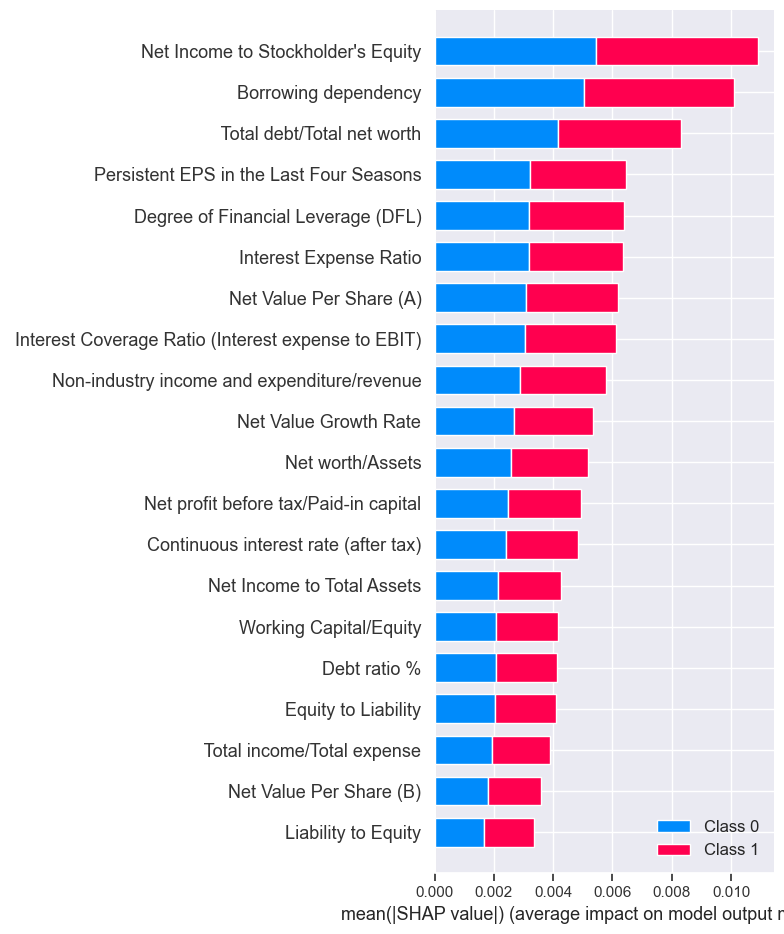

In [42]:
shap.initjs()
shap.summary_plot(shap_values, X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


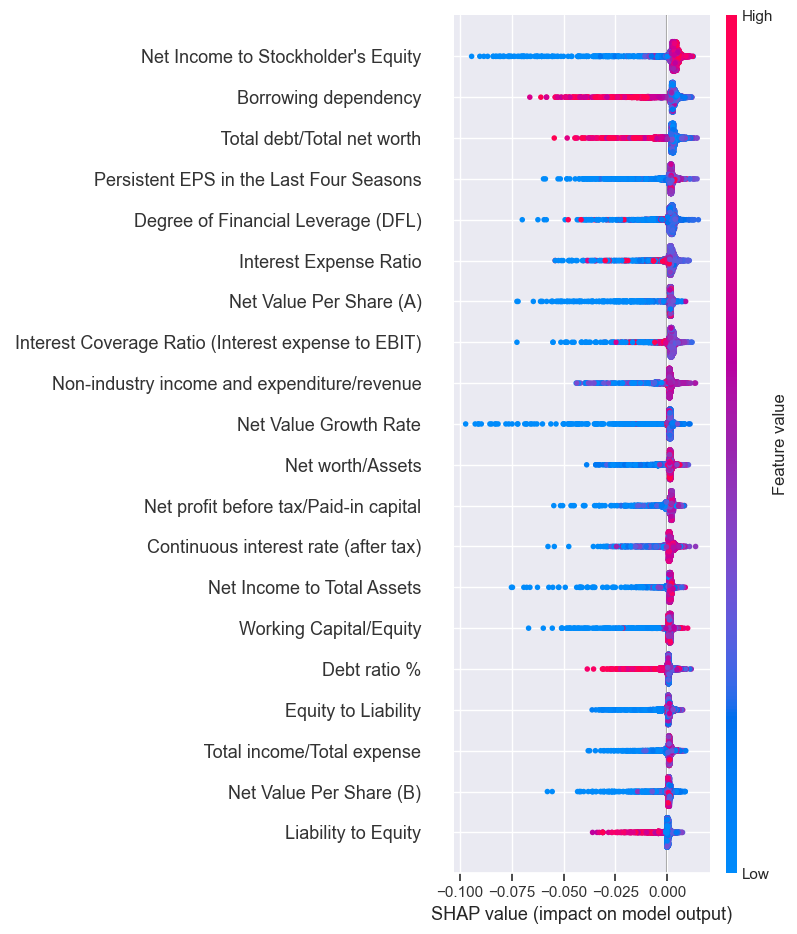

In [43]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

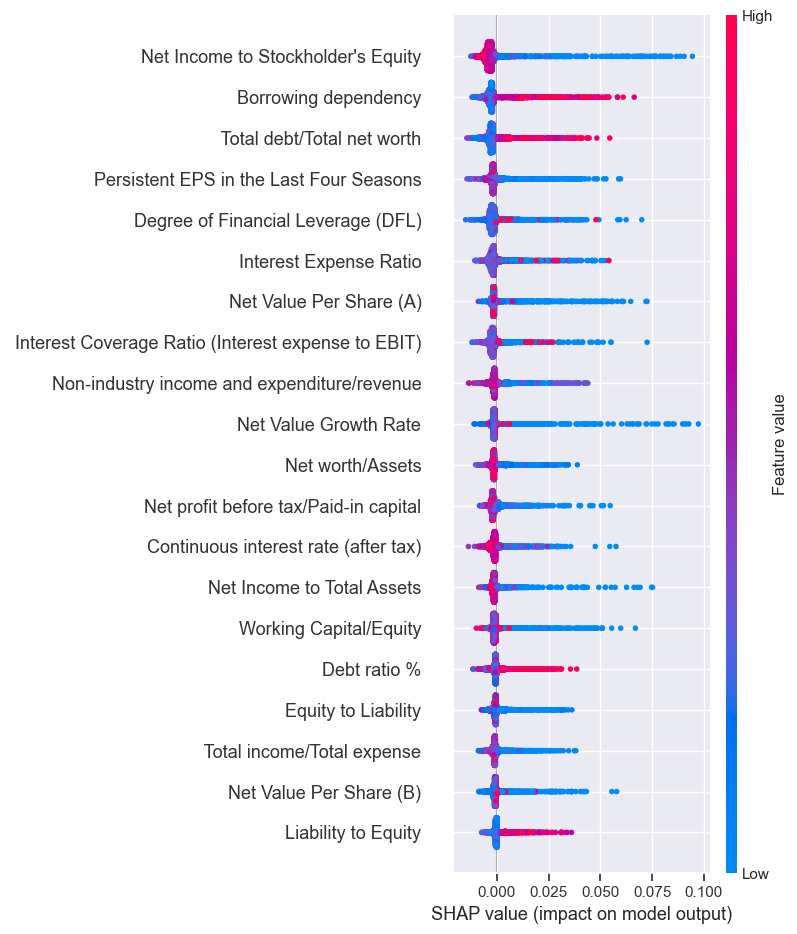

In [44]:
shap.initjs()
shap.summary_plot(shap_values[1], X_train)

The code isn't too complex. But there are a few caveats.

When plotting, we call shap_values[1]. For classification problems, there is a separate array of SHAP values for each possible outcome. In this case, we index in to get the SHAP values for the prediction of "True".
Calculating SHAP values can be slow. It isn't a problem here, because this dataset is small. But you'll want to be careful when running these to plot with reasonably sized datasets. The exception is when using an xgboost model, which SHAP has some optimizations for and which is thus much faster.
This provides a great overview of the model, but we might want to delve into a single feature. That's where SHAP dependence contribution plots come into play.

In [45]:
cols_name =pfi_df.columns[:20]
cols_name

Index([' Operating Profit Rate', ' Operating Profit Per Share (Yuan ¥)',
       ' ROA(C) before interest and depreciation before interest',
       ' Contingent liabilities/Net worth', ' Liability to Equity',
       ' Cash Flow Per Share', ' Operating Expense Rate',
       ' Interest Expense Ratio', ' Working Capital/Equity',
       ' Interest-bearing debt interest rate', ' Net Value Growth Rate',
       ' Realized Sales Gross Margin', ' Total Asset Turnover',
       ' Current Liabilities/Equity', ' Equity to Long-term Liability',
       ' Operating profit/Paid-in capital', ' Net Worth Turnover Rate (times)',
       ' After-tax Net Profit Growth Rate', ' Cash flow rate',
       ' Fixed Assets Turnover Frequency'],
      dtype='object')

In [46]:
X_train_RF = X_train.drop(columns=X_train.columns.difference(cols_name))
X_test_RF = X_test.drop(columns=X_test.columns.difference(cols_name))

In [47]:
X_train_RF.shape

(4389, 20)

In [48]:
X_test_RF.shape

(1881, 20)

## Data Scaling 

In [49]:
sc_X = StandardScaler()

Data Scaling for 30 features dataset

In [50]:
X_train_RF_standardized = sc_X.fit_transform(X_train_RF)
X_test_RF_standardized = sc_X.transform(X_test_RF)

## Sampling (SMOTETomek)

In [51]:
print("Shape of the X_train before applying SMOTETomek is: ", X_train_RF_standardized .shape)
print("Shape of the y_train data before applying SMOTETomek is: ", y_train.shape)
print("Shape of the X_test before applying SMOTETomek is: ", X_test_RF_standardized.shape)
print("Shape of the y_test before applying SMOTETomek is: ", y_test.shape)
print()
print("Before applying SMOTETomek the count of the fraud cases are: ", y_train.value_counts().values[1])
print("Before applying SMOTETomek the count of the non-fraud cases are: ", y_train.value_counts().values[0])
print("Before applying SMOTETomek the percentage of the fraud cases are: ", sum(y_train == 1)/ len(y_train) * 100.0)
print("Before applying SMOTETomek the percentage of the non-fraud cases are: ", sum(y_train == 0)/ len(y_train) * 100.0)
print("Original dataset shape %s" % Counter(y_train))

sm =SMOTETomek(random_state=42)

X_train_RF_s, y_train_RF_s = sm.fit_resample(X_train_RF_standardized, y_train)

print("Shape of the X_train after applying SMOTETomek is: ", X_train_RF_s.shape)
print("Shape of the y_train data after applying SMOTETomek is: ", y_train_RF_s.shape)
print()
print("After applying SMOTETomek the count of the fraud cases are: ", sum(y_train_RF_s == 1))
print("After applying SMOTETomek the count of the non-fraud cases are: ", sum(y_train_RF_s == 0))
print("After applying SMOTETomek the percentage of the fraud cases are: ", sum(y_train_RF_s == 1)/ len(y_train_RF_s) * 100.0)
print("After applying SMOTETomek the percentage of the non-fraud cases are: ", sum(y_train_RF_s == 0)/ len(y_train_RF_s) * 100.0)

print("Resampled dataset shape %s" % Counter(y_train_RF_s))

Shape of the X_train before applying SMOTETomek is:  (4389, 20)
Shape of the y_train data before applying SMOTETomek is:  (4389,)
Shape of the X_test before applying SMOTETomek is:  (1881, 20)
Shape of the y_test before applying SMOTETomek is:  (1881,)

Before applying SMOTETomek the count of the fraud cases are:  153
Before applying SMOTETomek the count of the non-fraud cases are:  4236
Before applying SMOTETomek the percentage of the fraud cases are:  3.4859876965140124
Before applying SMOTETomek the percentage of the non-fraud cases are:  96.51401230348598
Original dataset shape Counter({0: 4236, 1: 153})
Shape of the X_train after applying SMOTETomek is:  (8468, 20)
Shape of the y_train data after applying SMOTETomek is:  (8468,)

After applying SMOTETomek the count of the fraud cases are:  4234
After applying SMOTETomek the count of the non-fraud cases are:  4234
After applying SMOTETomek the percentage of the fraud cases are:  50.0
After applying SMOTETomek the percentage of the 

## Save dataframes

In [52]:
# train set and test set
pd.DataFrame(X_train_RF_s).to_csv('../train_test_set/X_train_taiwan.csv', index=False)
pd.DataFrame(X_test_RF_standardized).to_csv('../train_test_set/X_test_taiwan.csv', index=False)
pd.DataFrame(y_train_RF_s).to_csv('../train_test_set/y_train_taiwan.csv', index=False)
pd.DataFrame(y_test).to_csv('../train_test_set/y_test_taiwan.csv', index=False)